In [260]:
import importlib
import LSTM_GNN
importlib.reload(LSTM_GNN)
from LSTM_GNN import DataLoader, LSTMoutput
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import pandas as pd
import numpy as np

In [80]:
adj = pd.read_csv('2020_adj.csv')

In [164]:
loader = DataLoader('2020.csv', 120, 28*3, 21, 14)
x_train, y_train, x_test = loader.train_test_split()

model = Sequential()
model.add(LSTM(loader.n_pred*77, batch_input_shape=(loader.n_batch,loader.n_timesteps,77)))
model.add(Dense(loader.n_pred*77//2, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(loader.n_pred*77, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=100, batch_size=7)

TypeError: __init__() missing 2 required positional arguments: 'day_start' and 'day_end'

12/12 [==============================] - 0s 8ms/step


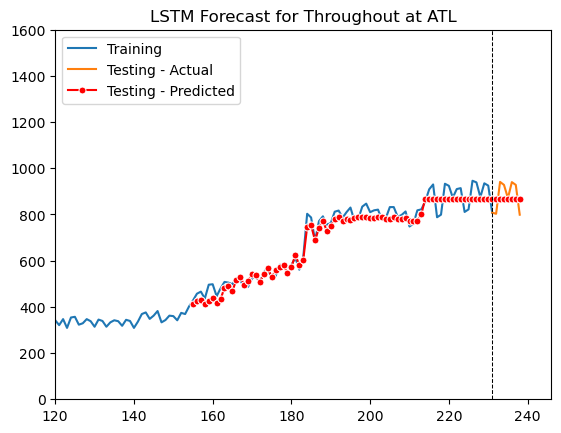

In [71]:
predicted = model.predict(x_test, batch_size=7)
result = LSTMoutput(loader, 2)
result.inverse_transform(predicted)
result.plot()

In [168]:
loader = DataLoader('2020.csv', 180, 28*4, 21, 7, 1, 366)
x_train, y_train, x_test, adj_matrix = loader.train_test_split(combined_data=adj)
model = Sequential()
model.add(LSTM(loader.n_pred*77, batch_input_shape=(loader.n_batch,loader.n_timesteps,77)))
model.add(Dense(loader.n_pred*77//2, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(loader.n_pred*77, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=100, batch_size=7)

Epoch 1/100
12/12 [==============================] - 1s 23ms/step - loss: 0.8711
Epoch 2/100
12/12 [==============================] - 0s 22ms/step - loss: 0.7199
Epoch 3/100
12/12 [==============================] - 0s 22ms/step - loss: 0.6349
Epoch 4/100
12/12 [==============================] - 0s 22ms/step - loss: 0.5912
Epoch 5/100
12/12 [==============================] - 0s 22ms/step - loss: 0.5404
Epoch 6/100
12/12 [==============================] - 0s 24ms/step - loss: 0.5011
Epoch 7/100
12/12 [==============================] - 0s 22ms/step - loss: 0.4726
Epoch 8/100
12/12 [==============================] - 0s 22ms/step - loss: 0.4419
Epoch 9/100
12/12 [==============================] - 0s 22ms/step - loss: 0.4219
Epoch 10/100
12/12 [==============================] - 0s 22ms/step - loss: 0.4096
Epoch 11/100
12/12 [==============================] - 0s 22ms/step - loss: 0.3920
Epoch 12/100
12/12 [==============================] - 0s 22ms/step - loss: 0.3725
Epoch 13/100
12/12 [=====

12/12 [==============================] - 0s 8ms/step


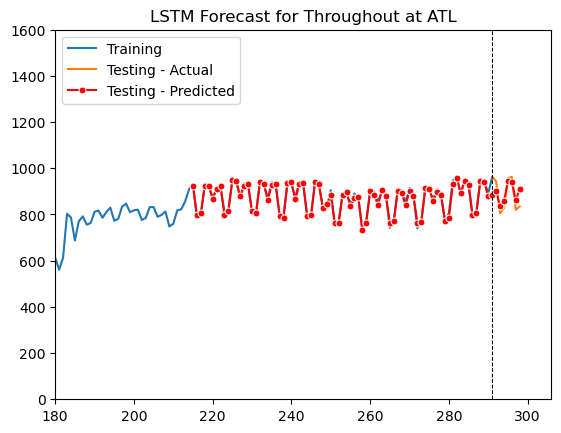

In [170]:
predicted = model.predict(x_test, batch_size=7)
result = LSTMoutput(loader, 2)
result.inverse_transform(predicted)
result.plot()

In [261]:
from LSTM_GNN import aggregate_errors

In [242]:
airport_list = ['ABQ', 'ANC', 'ATL', 'AUS', 'BDL', 'BHM', 'BNA', 'BOS', 'BUF', 'BUR', 'BWI',
                     'CLE', 'CLT', 'CVG', 'DAL', 'DAY', 'DCA', 'DEN', 'DFW', 'DTW', 'EWR', 'FLL', 'GYY',
                     'HNL', 'HOU', 'HPN', 'IAD', 'IAH', 'IND', 'ISP', 'JAX', 'JFK', 'LAS', 'LAX', 'LGA', 'LGB',
                     'MCI', 'MCO', 'MDW', 'MEM', 'MHT', 'MIA', 'MKE', 'MSP', 'MSY', 'OAK', 'OGG', 'OMA', 'ONT', 'ORD', 'OXR',
                     'PBI', 'PDX', 'PHL', 'PHX', 'PIT', 'PSP', 'PVD', 'RDU', 'RFD', 'RSW',
                     'SAN', 'SAT', 'SDF', 'SEA', 'SFO', 'SJC', 'SJU', 'SLC', 'SMF', 'SNA', 'STL', 'SWF',
                     'TEB', 'TPA', 'TUS', 'VNY']

In [243]:
testing_periods = np.arange(120, 360, 30)

In [244]:
large_airports = ['ATL', 'LAX', 'JFK', 'DFW', 'ORD', 'LAS', 'MCO', 'DEN', 'SFO', 'SEA']
midsize_airports = ['SJC', 'STL', 'DAL', 'AUS', 'BNA', 'PDX', 'MDW', 'HNL', 'TPA', 'DCA']

large_airports_index = []
for i in large_airports:
    large_airports_index.append(airport_list.index(i))
midsize_airports_index = []
for i in midsize_airports:
    midsize_airports_index.append(airport_list.index(i))

In [245]:
rmse, mae, rmse1, mae1, rmse2, mae2 = aggregate_errors(testing_periods, 10, 28*2, 21, 7, adj, large_airports_index, midsize_airports_index)

Epoch 1/100
2/2 [==============================] - 1s 34ms/step - loss: 0.7575
Epoch 2/100
2/2 [==============================] - 0s 35ms/step - loss: 0.5283
Epoch 3/100
2/2 [==============================] - 0s 31ms/step - loss: 0.3785
Epoch 4/100
2/2 [==============================] - 0s 30ms/step - loss: 0.2806
Epoch 5/100
2/2 [==============================] - 0s 29ms/step - loss: 0.2058
Epoch 6/100
2/2 [==============================] - 0s 29ms/step - loss: 0.1650
Epoch 7/100
2/2 [==============================] - 0s 32ms/step - loss: 0.1338
Epoch 8/100
2/2 [==============================] - 0s 29ms/step - loss: 0.1098
Epoch 9/100
2/2 [==============================] - 0s 54ms/step - loss: 0.0991
Epoch 10/100
2/2 [==============================] - 0s 30ms/step - loss: 0.1020
Epoch 11/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0875
Epoch 12/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0841
Epoch 13/100
2/2 [==============================]

array([1.6297435 , 1.62955545, 1.67407785, 1.54423622, 1.61633476,
       1.63827676, 1.6602675 , 1.65362821, 1.61731434, 1.57673425])

In [249]:
rmse1

array([8.83567255, 8.84342004, 9.0784891 , 8.59211794, 8.79637945,
       8.93271396, 8.87703942, 8.91316879, 8.68819507, 8.61233973])

In [250]:
rmse

array([8.79025232, 8.79758638, 9.03446371, 8.5513518 , 8.75564068,
       8.88903507, 8.83196671, 8.87033491, 8.64519341, 8.5720798 ])

In [213]:
np.sqrt(rmse.mean(axis=1)/(77*7))

array([24.57909529, 25.17174127, 25.04085312, 24.52476451, 25.18020934,
       24.38631732, 24.66145362, 24.2564606 , 24.78209546, 24.66215992])

In [215]:
mae.mean(axis=1)/(77*7)

array([12.61735811, 13.14620848, 12.89526467, 12.75052861, 13.25736989,
       12.93655506, 12.66835413, 12.59054142, 12.79006573, 13.08934017])

In [263]:
rmse_f, mae_f, rmse1_f, mae1_f, rmse2_f, mae2_f = aggregate_errors(testing_periods, 10, 28*2, 21, 7, adj, large_airports_index, midsize_airports_index, gnn=False)

Epoch 1/100
2/2 [==============================] - 1s 35ms/step - loss: 0.6900
Epoch 2/100
2/2 [==============================] - 0s 39ms/step - loss: 0.5188
Epoch 3/100
2/2 [==============================] - 0s 31ms/step - loss: 0.3620
Epoch 4/100
2/2 [==============================] - 0s 31ms/step - loss: 0.2591
Epoch 5/100
2/2 [==============================] - 0s 32ms/step - loss: 0.1759
Epoch 6/100
2/2 [==============================] - 0s 34ms/step - loss: 0.1395
Epoch 7/100
2/2 [==============================] - 0s 55ms/step - loss: 0.1088
Epoch 8/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0922
Epoch 9/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0867
Epoch 10/100
2/2 [==============================] - 0s 33ms/step - loss: 0.0823
Epoch 11/100
2/2 [==============================] - 0s 33ms/step - loss: 0.0802
Epoch 12/100
2/2 [==============================] - 0s 37ms/step - loss: 0.0690
Epoch 13/100
2/2 [==============================]

In [269]:
np.mean(rmse_f)

9.175166597285642

In [268]:
np.mean(rmse)

8.773790479207513

In [271]:
np.std(rmse_f)

0.21339939489314214

In [273]:
np.std(rmse)

0.14205885081024702

In [275]:
from scipy import stats
stats.ttest_ind(rmse, rmse_f)

Ttest_indResult(statistic=-4.697036591093909, pvalue=0.0001796128372564516)

array([9.4314124 , 9.44162474, 8.81882803, 9.07291449, 9.15752786,
       9.07180903, 9.10042931, 9.39606833, 8.89395057, 9.36710121])